# **Artificial Neuron: Perceptron**

---

The goal is to build **an artificial neuron** which will be able to **classify the data points into two classes**. The neuron will be trained using the perceptron learning rule. The neuron will be trained on data points generated using the `make_blobs` function from the `sklearn.datasets` module.

# **I- Dataset**

Let's first generate the dataset using the `make_blobs` function from the `sklearn.datasets` module. The `make_blobs` function can generate points belonging to two or more classes. The points belonging to two classes are linearly separable. The `make_blobs` function returns a tuple containing the data points and the labels. The labels are the class to which the data point belongs to. The `make_blobs` function takes the following parameters:

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

dimensions de X: (1000, 2)
dimensions de y: (1000, 1)


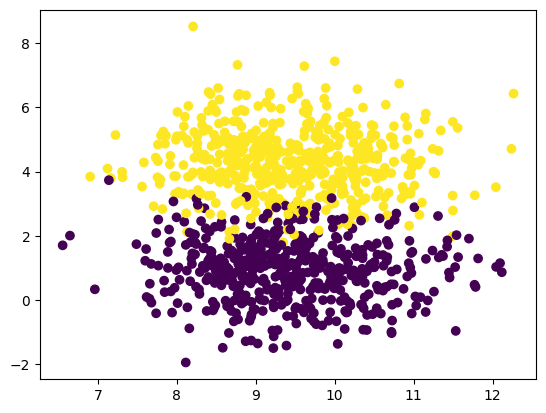

In [30]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=4)
y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y)
plt.show()

Every point in the dataset is a two-dimensional point. The `make_blobs` function allows us to separate these points into two classes that we will call class 0 and class 1. We want to separate these classes with a linear model.

# **II- Perceptron**

The first step is to initialise the weights and the bias. The weights and the bias are initialised to random values at first. The weights and the bias are stored in variables called `W` and `b`. The `W` variable contains the weights and `b` contains the bias. The weights are stored in a NumPy array.

Let's initialise the weights and the bias. The weights and the bias are initialised to random values using the `np.random.rand` function.

In [31]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

Thanks to a vectorized implementation, we can compute the output of the neuron for all the data points in the dataset in one line of code. The output of the neuron is computed using the following equation: `Z = X.W + b`. The `X` variable contains the data points and the `W` variable contains the weights. The `b` variable contains the bias. The `Z` variable contains the output of the neuron.

Next, `A` is the **activation function** of the neuron. The activation function of the neuron is the sigmoid function but it exists several other activation function such as the [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) function. It returns a value between 0 and 1 which indicates the probability that the data point belongs to class 1.

In [32]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def model(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

The objective now is to deminish the error between the output of the neuron and the labels. This is done by updating the weights and the bias. The weights and the bias are updated using the perceptron learning rule. The perceptron learning rule is the following: `W = W + alpha * (Y - A) * X` and `b = b + alpha * (Y - A)`. The `alpha` variable is the learning rate. The learning rate is a hyperparameter of the model. The learning rate controls how much the weights and the bias are updated. 

Thanks to an algorithm of gradient descent, we can compute the output of the neuron for all the data points in the dataset.

In [33]:
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [34]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [35]:
def gradient_descent(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

It is now possible for the neuron to tell us to which class a given data point belongs to. The neuron can do that by comparing the output of the neuron to 0.5. If the output of the neuron is greater than 0.5, the data point belongs to class 1. If the output of the neuron is less than 0.5, the data point belongs to class 0.

In [36]:
def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

Now that every part of the learning algorithm is implemented, we can train the neuron. The neuron is trained by running the learning algorithm for a certain number of epochs(`n_iter`). An epoch is a single iteration over the entire dataset. The number of epochs controls how many times the learning algorithm will be run over the entire dataset. The learning algorithm is run over the entire dataset for 100 epochs.

In [37]:
from sklearn.metrics import accuracy_score

def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    W, b = initialisation(X)

    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = gradient_descent(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()

    return (W, b)
    

0.956


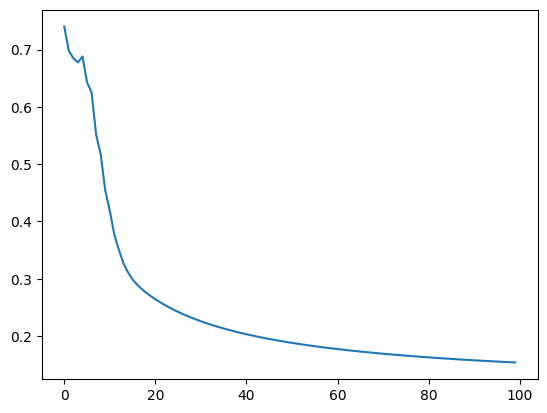

In [38]:
W, b = artificial_neuron(X, y)

We can display the evolution of the cost function `log_loss`, which represent how much the model is doing wrong separating the two groups of blobs in the dataset. As we can see, the cost function is decreasing over the epochs and tends to a minimum value near 0.

# **III- Decision Boundary**

Let's plot the decision boundary of the neuron. The decision boundary is **the line that separates the data points belonging to class 0 and the data points belonging to class 1**. The decision boundary is computed using the following equation: `0 = X.W + b`.  The decision boundary is a line in two dimensionsin this example.

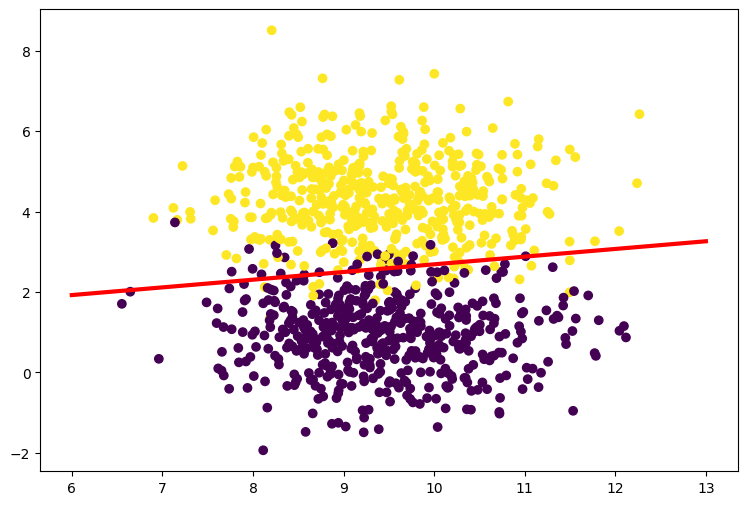

In [39]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y)

x1 = np.linspace(6, 13, 100)
x2 = ( - W[0] * x1 - b) / W[1]

ax.plot(x1, x2, c='red', lw=3)

That means that if we ask the model to predict the class of any new given point, it will give you the class it belongs to refering to its position compared to the decision boundary. 

# IV- 3D Visualization

Thanks to plotly, we can visualize the decision boundary in 3D. The decision boundary is a plane in three dimensions in this example.

In [40]:
import plotly.graph_objects as go

In [41]:
fig = go.Figure(data=[go.Scatter3d( 
    x=X[:, 0].flatten(),
    y=X[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),   
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

In [42]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0] * xx0 + W[1] * xx1 + b
A = sigmoid(Z)

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity = 0.7, reversescale=True)]))

fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), opacity = 0.9, reversescale=True))

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "perspective"
fig.show()


## **V- Conclusion**

We have built an artificial neuron which is able to classify the data points into two classes.

The neuron was trained using the perceptron learning rule. The neuron was trained on data points generated using the `make_blobs` function from the `sklearn.datasets` module. Then, we trained the neuron by running the learning algorithm for a certain number of epochs(`n_iter`).
The gradient descent method was used to compute the perfect parameter for the model to separate two groups of blobs in the dataset.

We can now use this neuron to classify any new data point into one of the two classes.

## **VI- References**

- [Perceptron](https://en.wikipedia.org/wiki/Perceptron)
- [Perceptron Learning Rule](https://en.wikipedia.org/wiki/Perceptron#Learning_algorithm)
- [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent)
- [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression)
- [Sigmoid Function](https://en.wikipedia.org/wiki/Sigmoid_function)
- [ReLU Function](https://en.wikipedia.org/wiki/Rectifier_(neural_networks))
- [Decision Boundary](https://en.wikipedia.org/wiki/Decision_boundary)
- [Coding artificial neuron in Python](https://www.youtube.com/watch?v=ntKn5TPHHAk)
- [Machine Learnia](https://youtu.be/5TpBe7KTAHE?list=PLO_fdPEVlfKoanjvTJbIbd9V5d9Pzp8Rw)